Exercise 1. Bank earnings

Say you manage a bank that gives out 10,000 loans. The default rate is 0.03 and you lose $200,000 in each foreclosure.

Create a random variable S

that contains the earnings of your bank. Calculate the total amount of money lost in this scenario.
Instructions
100 XP

    Using the sample function, generate a vector called defaults that contains n samples from a vector of c(0,1), where 0 indicates a payment and 1 indicates a default
    Multiply the total number of defaults by the loss per foreclosure.


In [1]:
exp_S = 10000 * 0.03 * -200000
print(exp_S)

-60000000.0


Exercise 2. Bank earnings Monte Carlo

Run a Monte Carlo simulation with 10,000 outcomes for S

, the sum of losses over 10,000 loans. Make a histogram of the results.
Instructions
100 XP

    Within a replicate loop with 10,000 iterations, use sample to generate a list of 10,000 loan outcomes: payment (0) or default (1). Use the outcome order c(0,1) and probability of default p_default.
    Still within the loop, use the function sum to count the number of foreclosures multiplied by loss_per_foreclosure to return the sum of all losses across the 10,000 loans. If you do not take the sum inside the replicate loop, DataCamp may crash with a "Session Expired" error.
    Plot the histogram of values using the function hist.


(array([  1.,   3.,   2.,   1.,   2.,   3.,   2.,   7.,  19.,  13.,  45.,
         62.,  71.,  70., 142., 191., 123., 258., 353., 266., 479., 527.,
        612., 463., 654., 675., 455., 695., 653., 399., 559., 506., 393.,
        228., 285., 242., 128., 144.,  91.,  45.,  46.,  36.,  23.,  10.,
         10.,   4.,   1.,   2.,   0.,   1.]),
 array([-74000000., -73460000., -72920000., -72380000., -71840000.,
        -71300000., -70760000., -70220000., -69680000., -69140000.,
        -68600000., -68060000., -67520000., -66980000., -66440000.,
        -65900000., -65360000., -64820000., -64280000., -63740000.,
        -63200000., -62660000., -62120000., -61580000., -61040000.,
        -60500000., -59960000., -59420000., -58880000., -58340000.,
        -57800000., -57260000., -56720000., -56180000., -55640000.,
        -55100000., -54560000., -54020000., -53480000., -52940000.,
        -52400000., -51860000., -51320000., -50780000., -50240000.,
        -49700000., -49160000., -48620000., -4

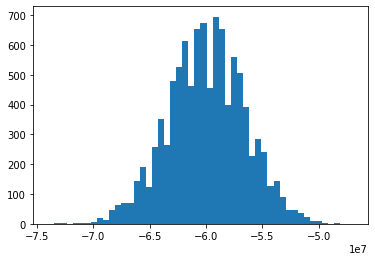

In [4]:
import pyro
import torch
import matplotlib.pyplot as plt

def loans(def_p, nr_loans, loss, earning):
    with pyro.plate("loans", nr_loans):
        loan_samples = pyro.sample("loans", pyro.distributions.Binomial(probs=def_p))
        return torch.where(loan_samples == 1.0, torch.tensor(loss), torch.tensor(earning))
    
loss_sums = []
for _ in range(10000):
    loss_sums.append(torch.sum(loans(0.03, 10000, -200000.0, 0.0)).item())
    
plt.hist(loss_sums, bins=50)

Exercise 3. Bank earnings expected value

What is the expected value of S

, the sum of losses over 10,000 loans? For now, assume a bank makes no money if the loan is paid.
Instructions
100 XP

    Using the chances of default (p_default), calculate the expected losses over 10,000 loans.


In [5]:
print(exp_S)

-60000000.0


Exercise 4. Bank earnings standard error

What is the standard error of S

?
Instructions
100 XP

    Compute the standard error of the random variable S you generated in the previous exercise, the summed outcomes of 10,000 loans.


In [6]:
import math

stderr_S = math.sqrt(10000) * 200000 * math.sqrt(0.03 * 0.97)
print(stderr_S)

3411744.421846396


Exercise 5. Bank earnings interest rate - 1

So far, we've been assuming that we make no money when people pay their loans and we lose a lot of money when people default on their loans. Assume we give out loans for $180,000. How much money do we need to make when people pay their loans so that our net loss is $0?

In other words, what interest rate do we need to charge in order to not lose money?
Instructions
100 XP

    If the amount of money lost or gained equals 0, the probability of default times the total loss per default equals the amount earned per probability of the loan being paid.
    Divide the total amount needed per loan by the loan amount to determine the interest rate.


In [10]:
interest_break_even = 0.03 * 180000 / 0.97
print(interest_break_even)
interest_rate = interest_break_even / 180000
print(interest_rate)

5567.010309278351
0.030927835051546396


Exercise 6. Bank earnings interest rate - 2

With the interest rate calculated in the last example, we still lose money 50% of the time. What should the interest rate be so that the chance of losing money is 1 in 20?

In math notation, what should the interest rate be so that Pr(S<0)=0.05

?

Remember that we can add a constant to both sides of the equation to get:
Pr(S−E[S]SE[S]<−E[S]SE[S])

which is

Pr(Z<−[lp+x(1−p)]n(x−l)np(1−p)−−−−−−−−√)=0.05

Let z = qnorm(0.05) give us the value of z for which:
Pr(Z≤z)=0.05

Instructions
100 XP

    Use the qnorm function to compute a continuous variable at given quantile of the distribution to solve for z.
    In this equation, l

, p, and n
are known values. Once you've solved for z, solve for x.
Divide x by the loan amount to calculate the rate.

In [19]:
z = pyro.distributions.Normal(torch.zeros(1), torch.ones(1)).icdf(torch.tensor(0.05)).item()
n = 10000
p = 0.03
l = -180000

w = -1 * l * (n * p - z * math.sqrt(n * p * (1 - p))) / (n * (1 - p) + z * math.sqrt(n * p * (1 - p)))
needed_interest = w
needed_interest_rate = w / 180000

print(needed_interest)
print(needed_interest_rate)

6105.355550955643
0.033918641949753574
